In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as matplotlib
print(matplotlib.__version__)

3.3.4


In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
FIGSIZE = (12,5)

In [4]:
AGE_BEGIN = 2010
AGE_END = 2020
years = [year for year in range(AGE_BEGIN,AGE_END+1)]

TARGET_IND = 'Налог на доходы физических лиц'
TARGET_ORG = 'Налог на прибыль организаций'

In [5]:
PATH = '../data/Годовые отчеты об исполнении бюджета/'

profits = {}

for year in years:
    if year > 2015:
         comma = ','
    else:
        comma = ''

    # 
    profit = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'доходы (исполнено){comma} {year}', header=0)
    profit = profit.drop(0)
    profits[year] = profit

In [6]:
for year in years:
    profits[year].rename(columns={f'{profits[year].columns[0]}':'name'}, inplace=True)

In [7]:
targets_ind = [profits[year][(profits[year]['name'].str.strip() == TARGET_IND)].iloc[:,-2].values[0] for year in years]
targets_ind

[7721641673.21,
 8449950600.7,
 9230786186.74,
 10112982845.2,
 10463556560.7,
 10131384437.07,
 10804668232.8,
 11136958600.58,
 12708629464.61,
 13288923303.12,
 14636359614.57]

<BarContainer object of 11 artists>

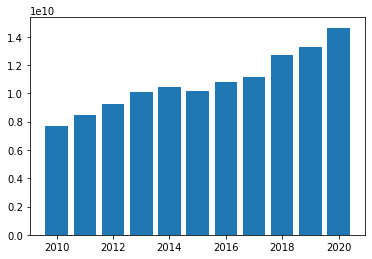

In [8]:
plt.bar(years, targets_ind)

In [9]:
targets_org = [profits[year][(profits[year]['name'].str.strip() == TARGET_ORG)].iloc[:,-2].values[0] for year in years]
targets_org

[3980212142.4,
 6262562069.63,
 5279887784.7,
 2200021502.01,
 1837840442.62,
 3114014266.32,
 4280042099.75,
 4022683492.19,
 8128882485.27,
 8162340492.33,
 5058407816.68]

<BarContainer object of 11 artists>

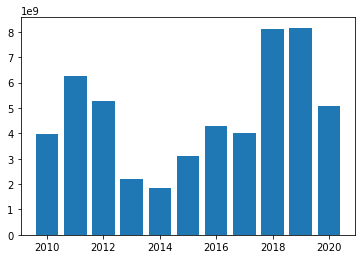

In [10]:
plt.bar(years, targets_org)

In [11]:
df = pd.DataFrame({'Год': years, TARGET_IND: targets_ind, TARGET_ORG: targets_org})

In [12]:
df

,Год,Налог на доходы физических лиц,Налог на прибыль организаций
0,2010,7721641673.21,3980212142.40
1,2011,8449950600.70,6262562069.63
2,2012,9230786186.74,5279887784.70
3,2013,10112982845.20,2200021502.01
4,2014,10463556560.70,1837840442.62
5,2015,10131384437.07,3114014266.32
6,2016,10804668232.80,4280042099.75
7,2017,11136958600.58,4022683492.19
8,2018,12708629464.61,8128882485.27
9,2019,13288923303.12,8162340492.33


In [13]:
df[[TARGET_IND, TARGET_ORG]] = df[[TARGET_IND, TARGET_ORG]].apply(lambda x: x/1000000)

In [14]:
df.to_csv('../data/target.csv', index=False, encoding='utf-8-sig')